In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import wave
import numpy as np
from scipy.stats import gaussian_kde, norm, kurtosis, skew
import seaborn as sns
import librosa
import librosa.display
import sympy as sp
import os

In [31]:
audio_file = r"C:\Users\dishi\Downloads\archive\for-norm\training\10file"

In [32]:
def read_audio_file(file_path):
    audio_file = wave.open(file_path, "r")
    audio_data = audio_file.readframes(-1)
    # Convert audio data to floating-point format
    audio_data = np.frombuffer(audio_data, dtype=np.int16).astype(np.float32)
    sample_rate = audio_file.getframerate()
    audio_file.close()
    return audio_data, sample_rate


In [33]:
def analyze_audio(file_path):
    audio_data, sample_rate = read_audio_file(file_path)
    time = np.linspace(0, len(audio_data) / sample_rate, num=len(audio_data))
    
    # Basic stats
    mean = np.mean(audio_data)
    std_dev = np.std(audio_data)
    skewness = skew(audio_data)
    kurtosis_val = kurtosis(audio_data)
    
    # Librosa features
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(audio_data))
    rms_energy = np.mean(librosa.feature.rms(y=audio_data))
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio_data, sr=sample_rate))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio_data, sr=sample_rate))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio_data, sr=sample_rate))
    mfccs = np.mean(librosa.feature.mfcc(y=audio_data, sr=sample_rate), axis=1)
    
    results = {
        'file_name': os.path.basename(file_path),
        'mean': mean,
        'std_dev': std_dev,
        'skewness': skewness,
        'kurtosis': kurtosis_val,
        'zero_crossing_rate': zero_crossing_rate,
        'rms_energy': rms_energy,
        'spectral_centroid': spectral_centroid,
        'spectral_bandwidth': spectral_bandwidth,
        'spectral_rolloff': spectral_rolloff,
        'mfccs': mfccs.tolist()
    }
    
    return results

In [34]:
def main():
    folder_path = r"C:\Users\dishi\Downloads\archive\for-norm\training\10file"

    file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.wav')]
    
    all_results = []
    for file_path in file_paths:
        results = analyze_audio(file_path)
        all_results.append(results)
    
    df = pd.DataFrame(all_results)
    print(df)

if __name__ == '__main__':
    main()

  file_name          mean      std_dev  skewness   kurtosis  \
0    f1.wav    539.137146  4848.114258  0.921095   5.928872   
1    f2.wav      2.051531  6144.437012 -0.313412   1.994324   
2    f3.wav    752.082642  2984.563232  2.768345  14.454004   
3    f4.wav      0.847267  5521.907227  1.080219   6.009534   
4    f5.wav    -24.756250  7670.354980 -0.564665   1.421240   
5    r1.wav      2.024781  5712.478027  0.576843   3.196277   
6    r2.wav      0.360108  5832.503906  0.339987   2.680361   
7    r3.wav     -0.086049  5423.742188  0.483702   3.878497   
8    r4.wav      0.871962  3094.532227 -0.736224  13.079041   
9    r5.wav -32767.873047     0.332008  2.244755   3.049957   

   zero_crossing_rate    rms_energy  spectral_centroid  spectral_bandwidth  \
0            0.123686   4517.311035        1357.662493         1413.032063   
1            0.150930   5462.206055        1821.834900         1485.080277   
2            0.122645   2879.702881        1328.683966         1331.1173

In [36]:
df.columns()

NameError: name 'df' is not defined

In [37]:
folder_path = r"C:\Users\dishi\Downloads\archive\for-norm\training\10file"
file_names = ['r1.wav', 'r2.wav', 'r3.wav', 'r4.wav', 'r5.wav', 'f1.wav', 'f2.wav', 'f3.wav', 'f4.wav', 'f5.wav']

In [38]:
plt.figure(figsize=(20, 20))
nrows, ncols = 5, 2

<Figure size 2000x2000 with 0 Axes>

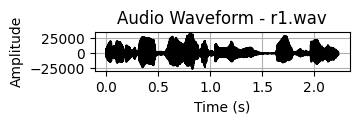

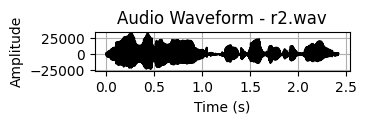

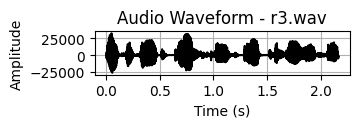

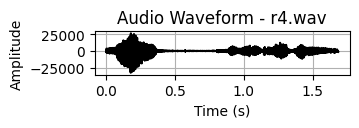

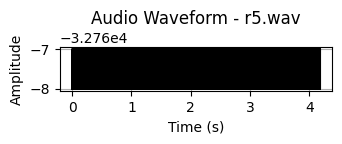

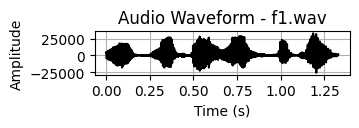

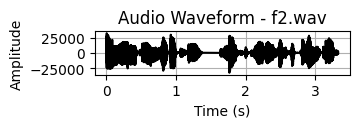

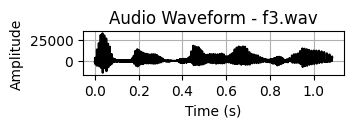

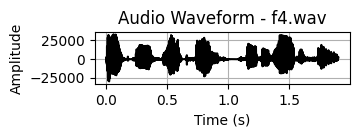

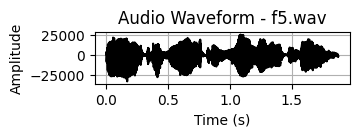

In [40]:

for idx, file_name in enumerate(file_names):
    audio_file_path = os.path.join(folder_path, file_name)
    
    # Read the audio file
    audio_file = wave.open(audio_file_path, "r")
    audio_data = audio_file.readframes(-1)
    audio_data = np.frombuffer(audio_data, dtype=np.int16)
    sample_rate = audio_file.getframerate()
    time = np.linspace(0, len(audio_data) / sample_rate, num=len(audio_data))
    
    # Close the audio file
    audio_file.close()

    # Plot the waveform
    plt.subplot(nrows, ncols, idx + 1)
    plt.plot(time, audio_data, color='black')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Audio Waveform - {file_name}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [42]:
def plot_features(file_names, feature_function, feature_name, xlabel, ylabel):
    plt.figure(figsize=(20, 20))
    for idx, file_name in enumerate(file_names):
        audio_file_path = os.path.join(folder_path, file_name)
        
        # Read the audio file
        audio_file = wave.open(audio_file_path, "r")
        audio_data = audio_file.readframes(-1)
        audio_data = np.frombuffer(audio_data, dtype=np.int16)
        sample_rate = audio_file.getframerate()
        
        # Close the audio file
        audio_file.close()
        
        # Plot the feature
        plt.subplot(nrows, ncols, idx + 1)
        feature_function(audio_data)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(f'{feature_name} - {file_name}')
        plt.grid(True)
    plt.tight_layout()
    plt.show()

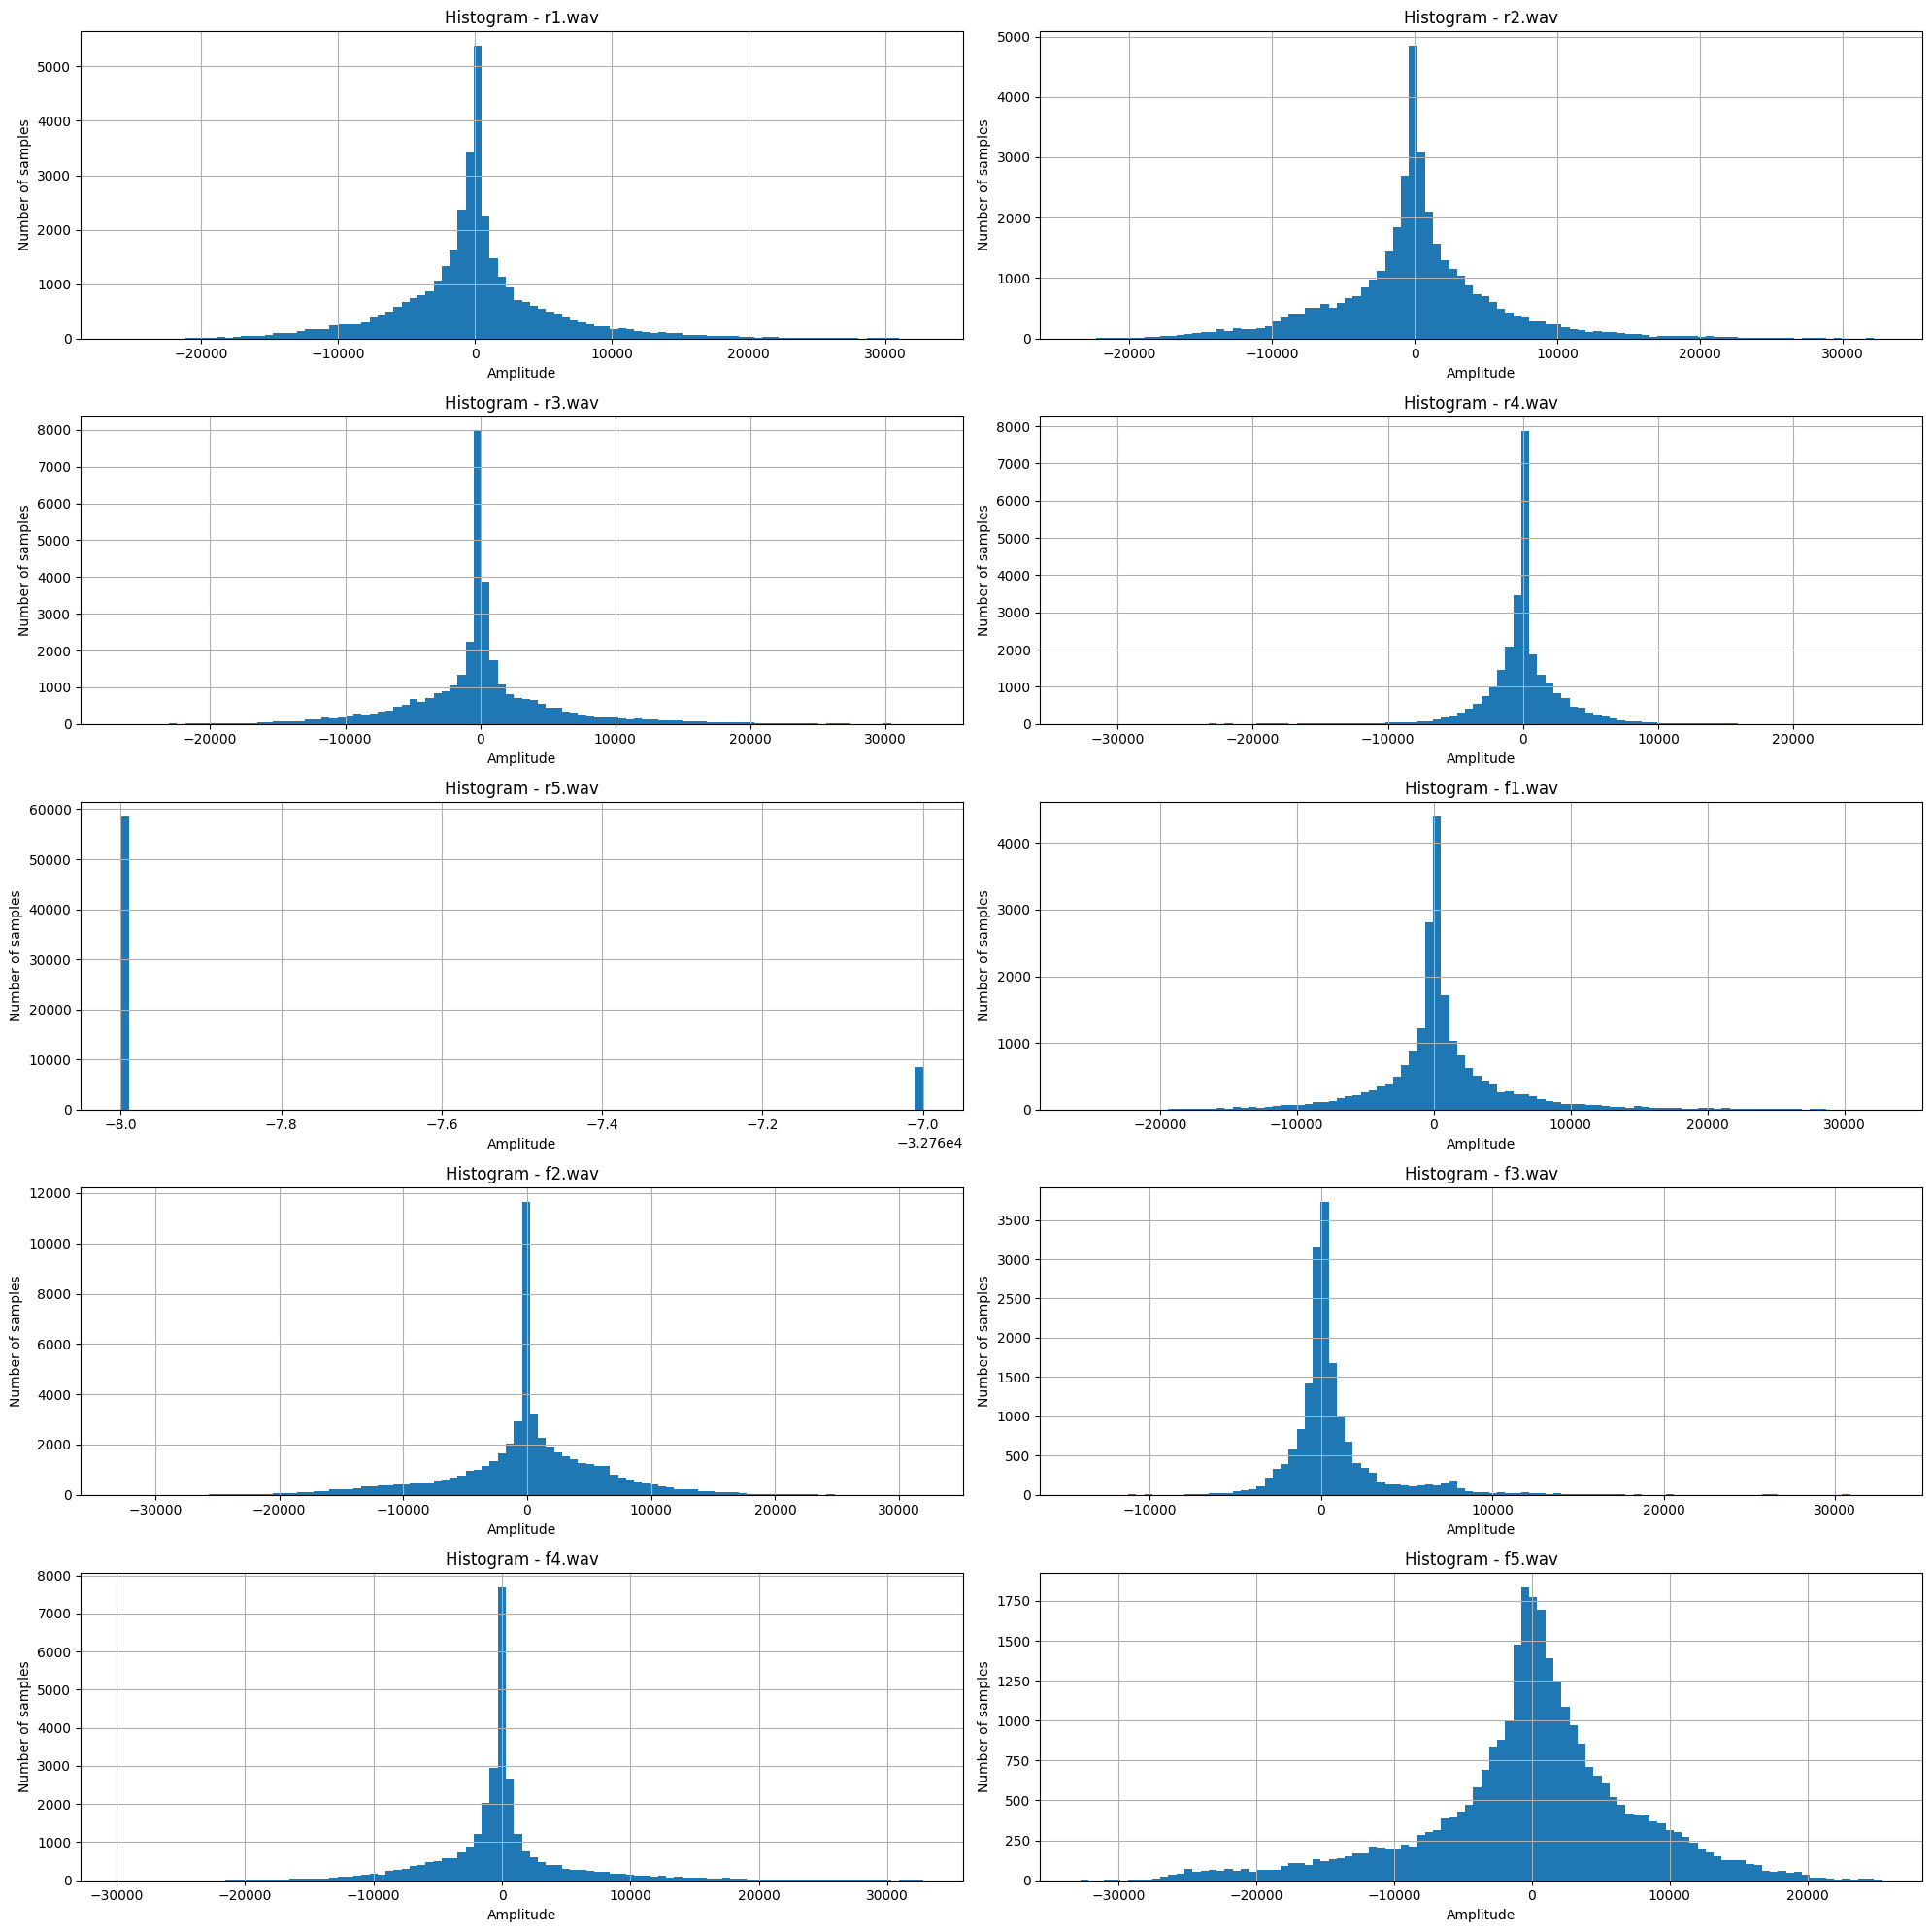

In [43]:
# Histogram
plot_features(file_names, lambda x: plt.hist(x, bins=100), "Histogram", "Amplitude", "Number of samples")

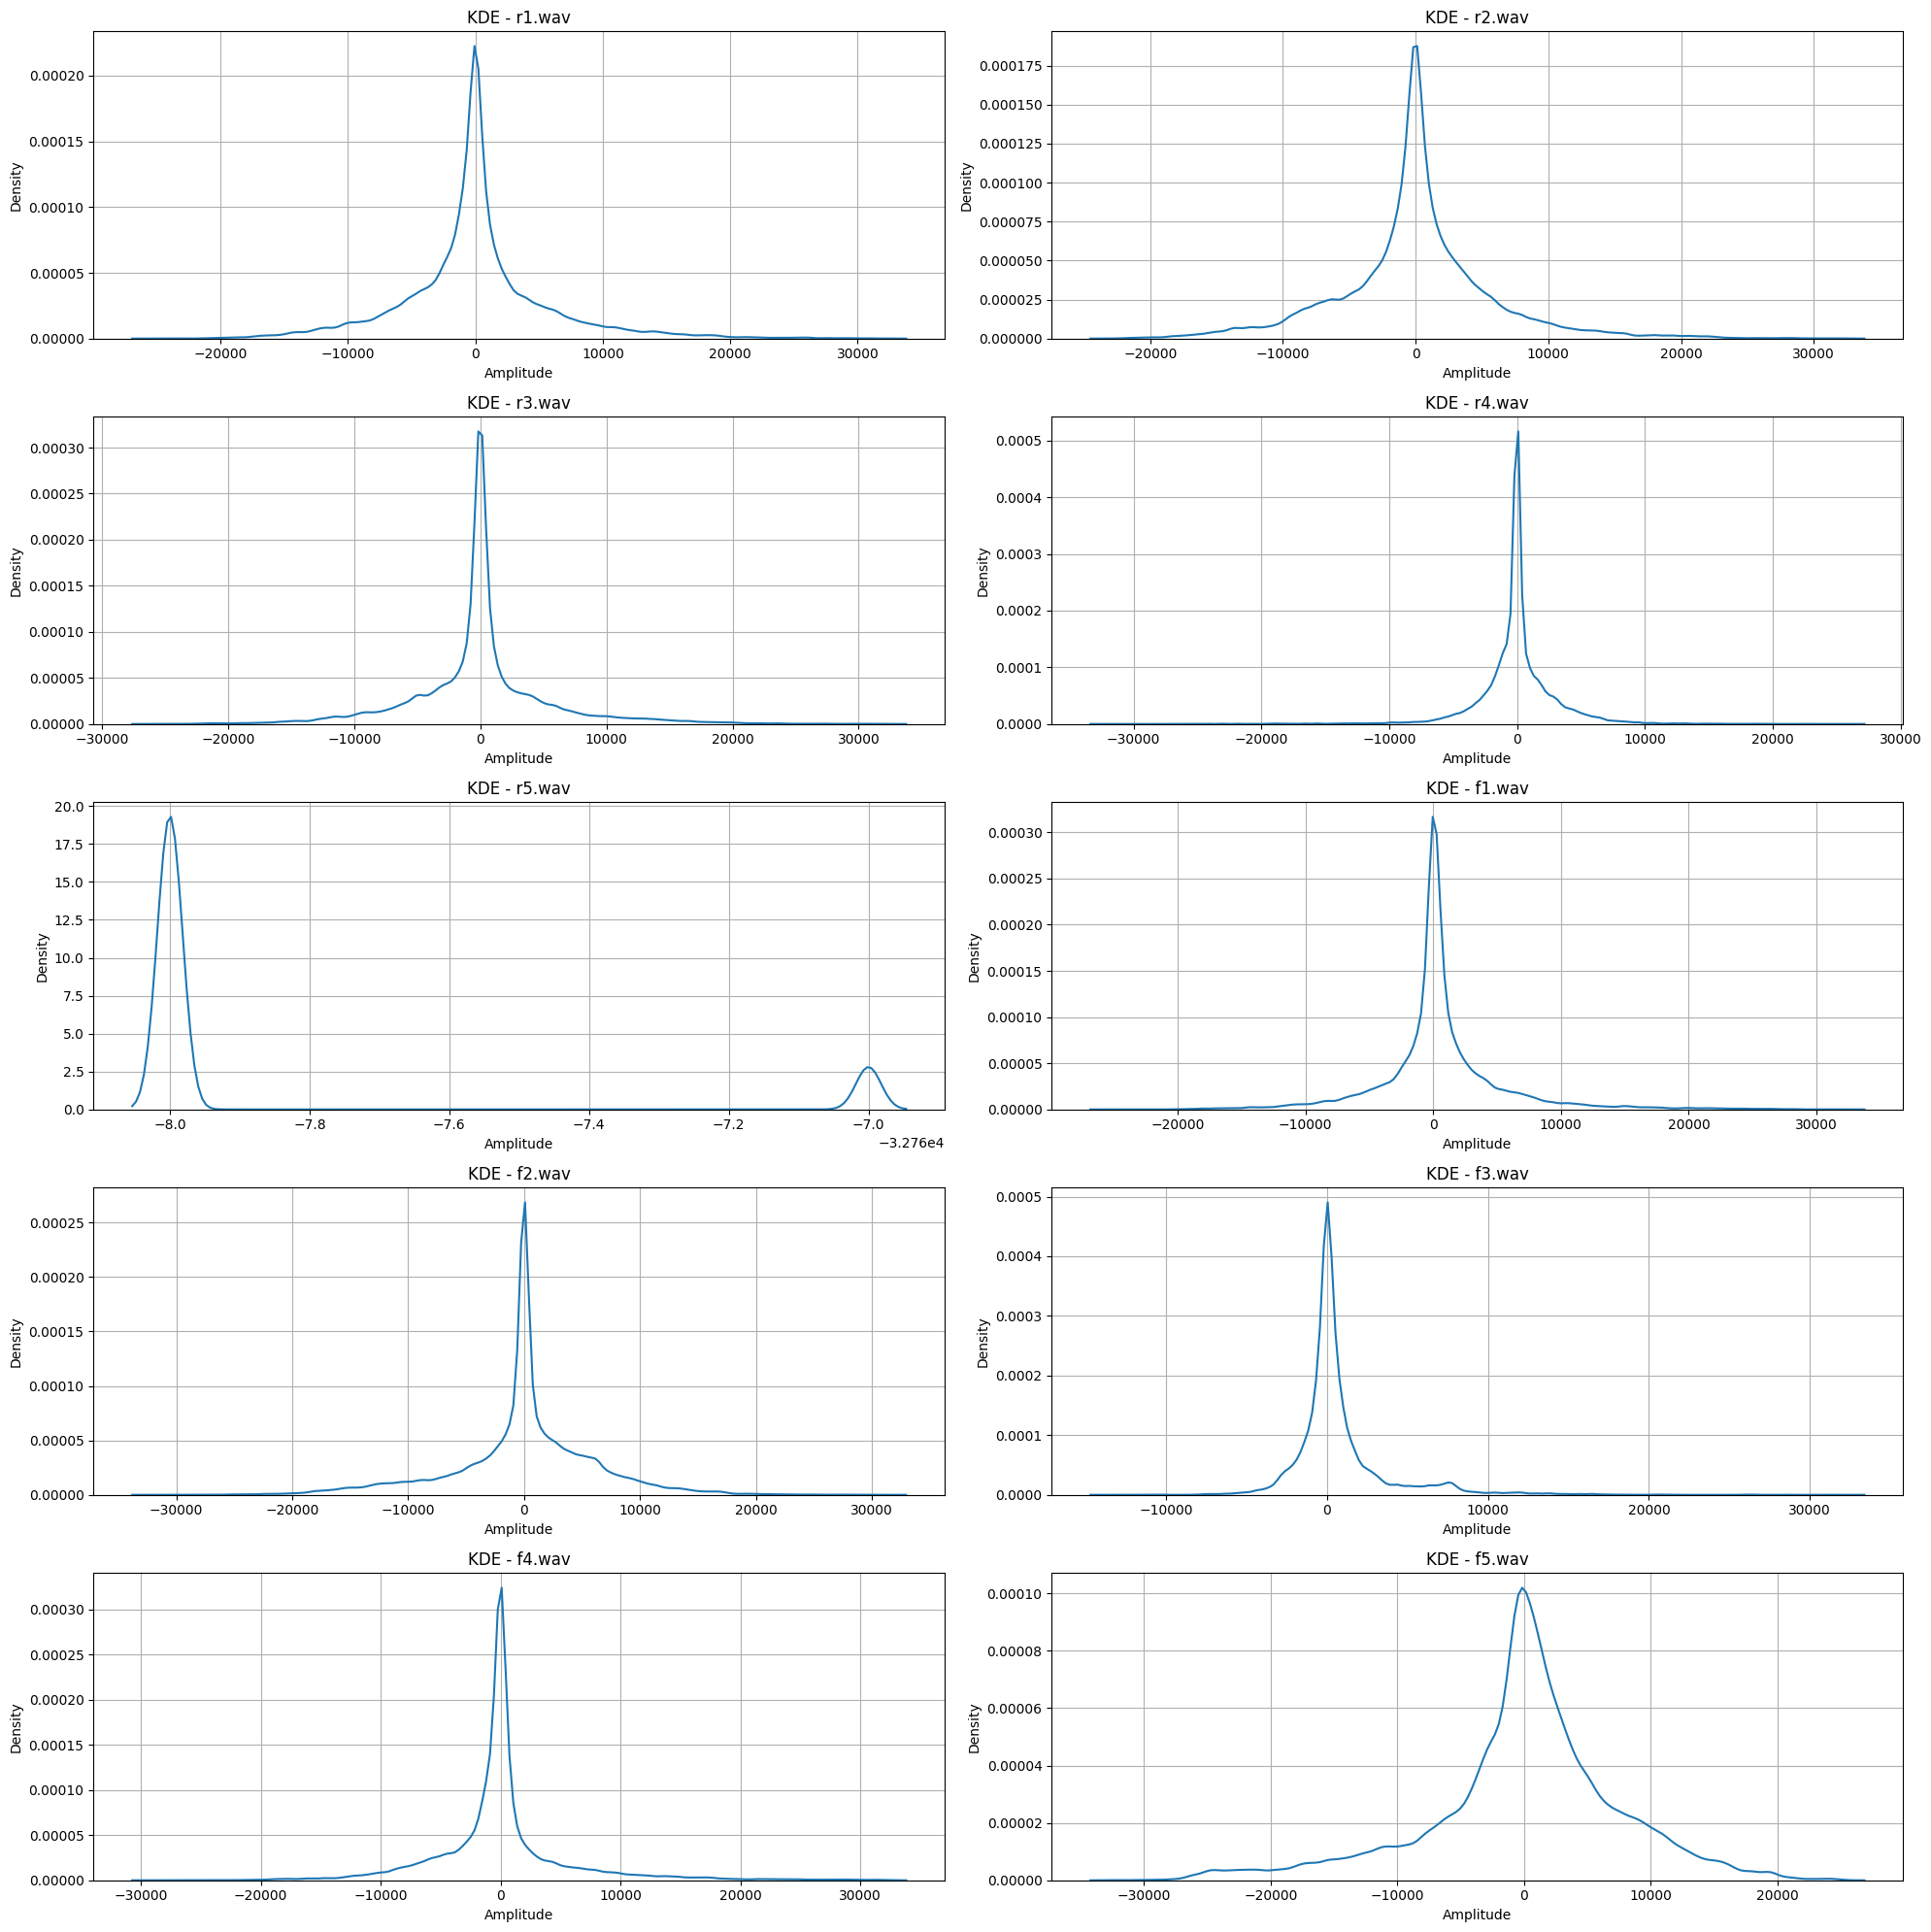

In [44]:
# KDE
plot_features(file_names, lambda x: sns.kdeplot(x, bw_adjust=0.5), "KDE", "Amplitude", "Density")


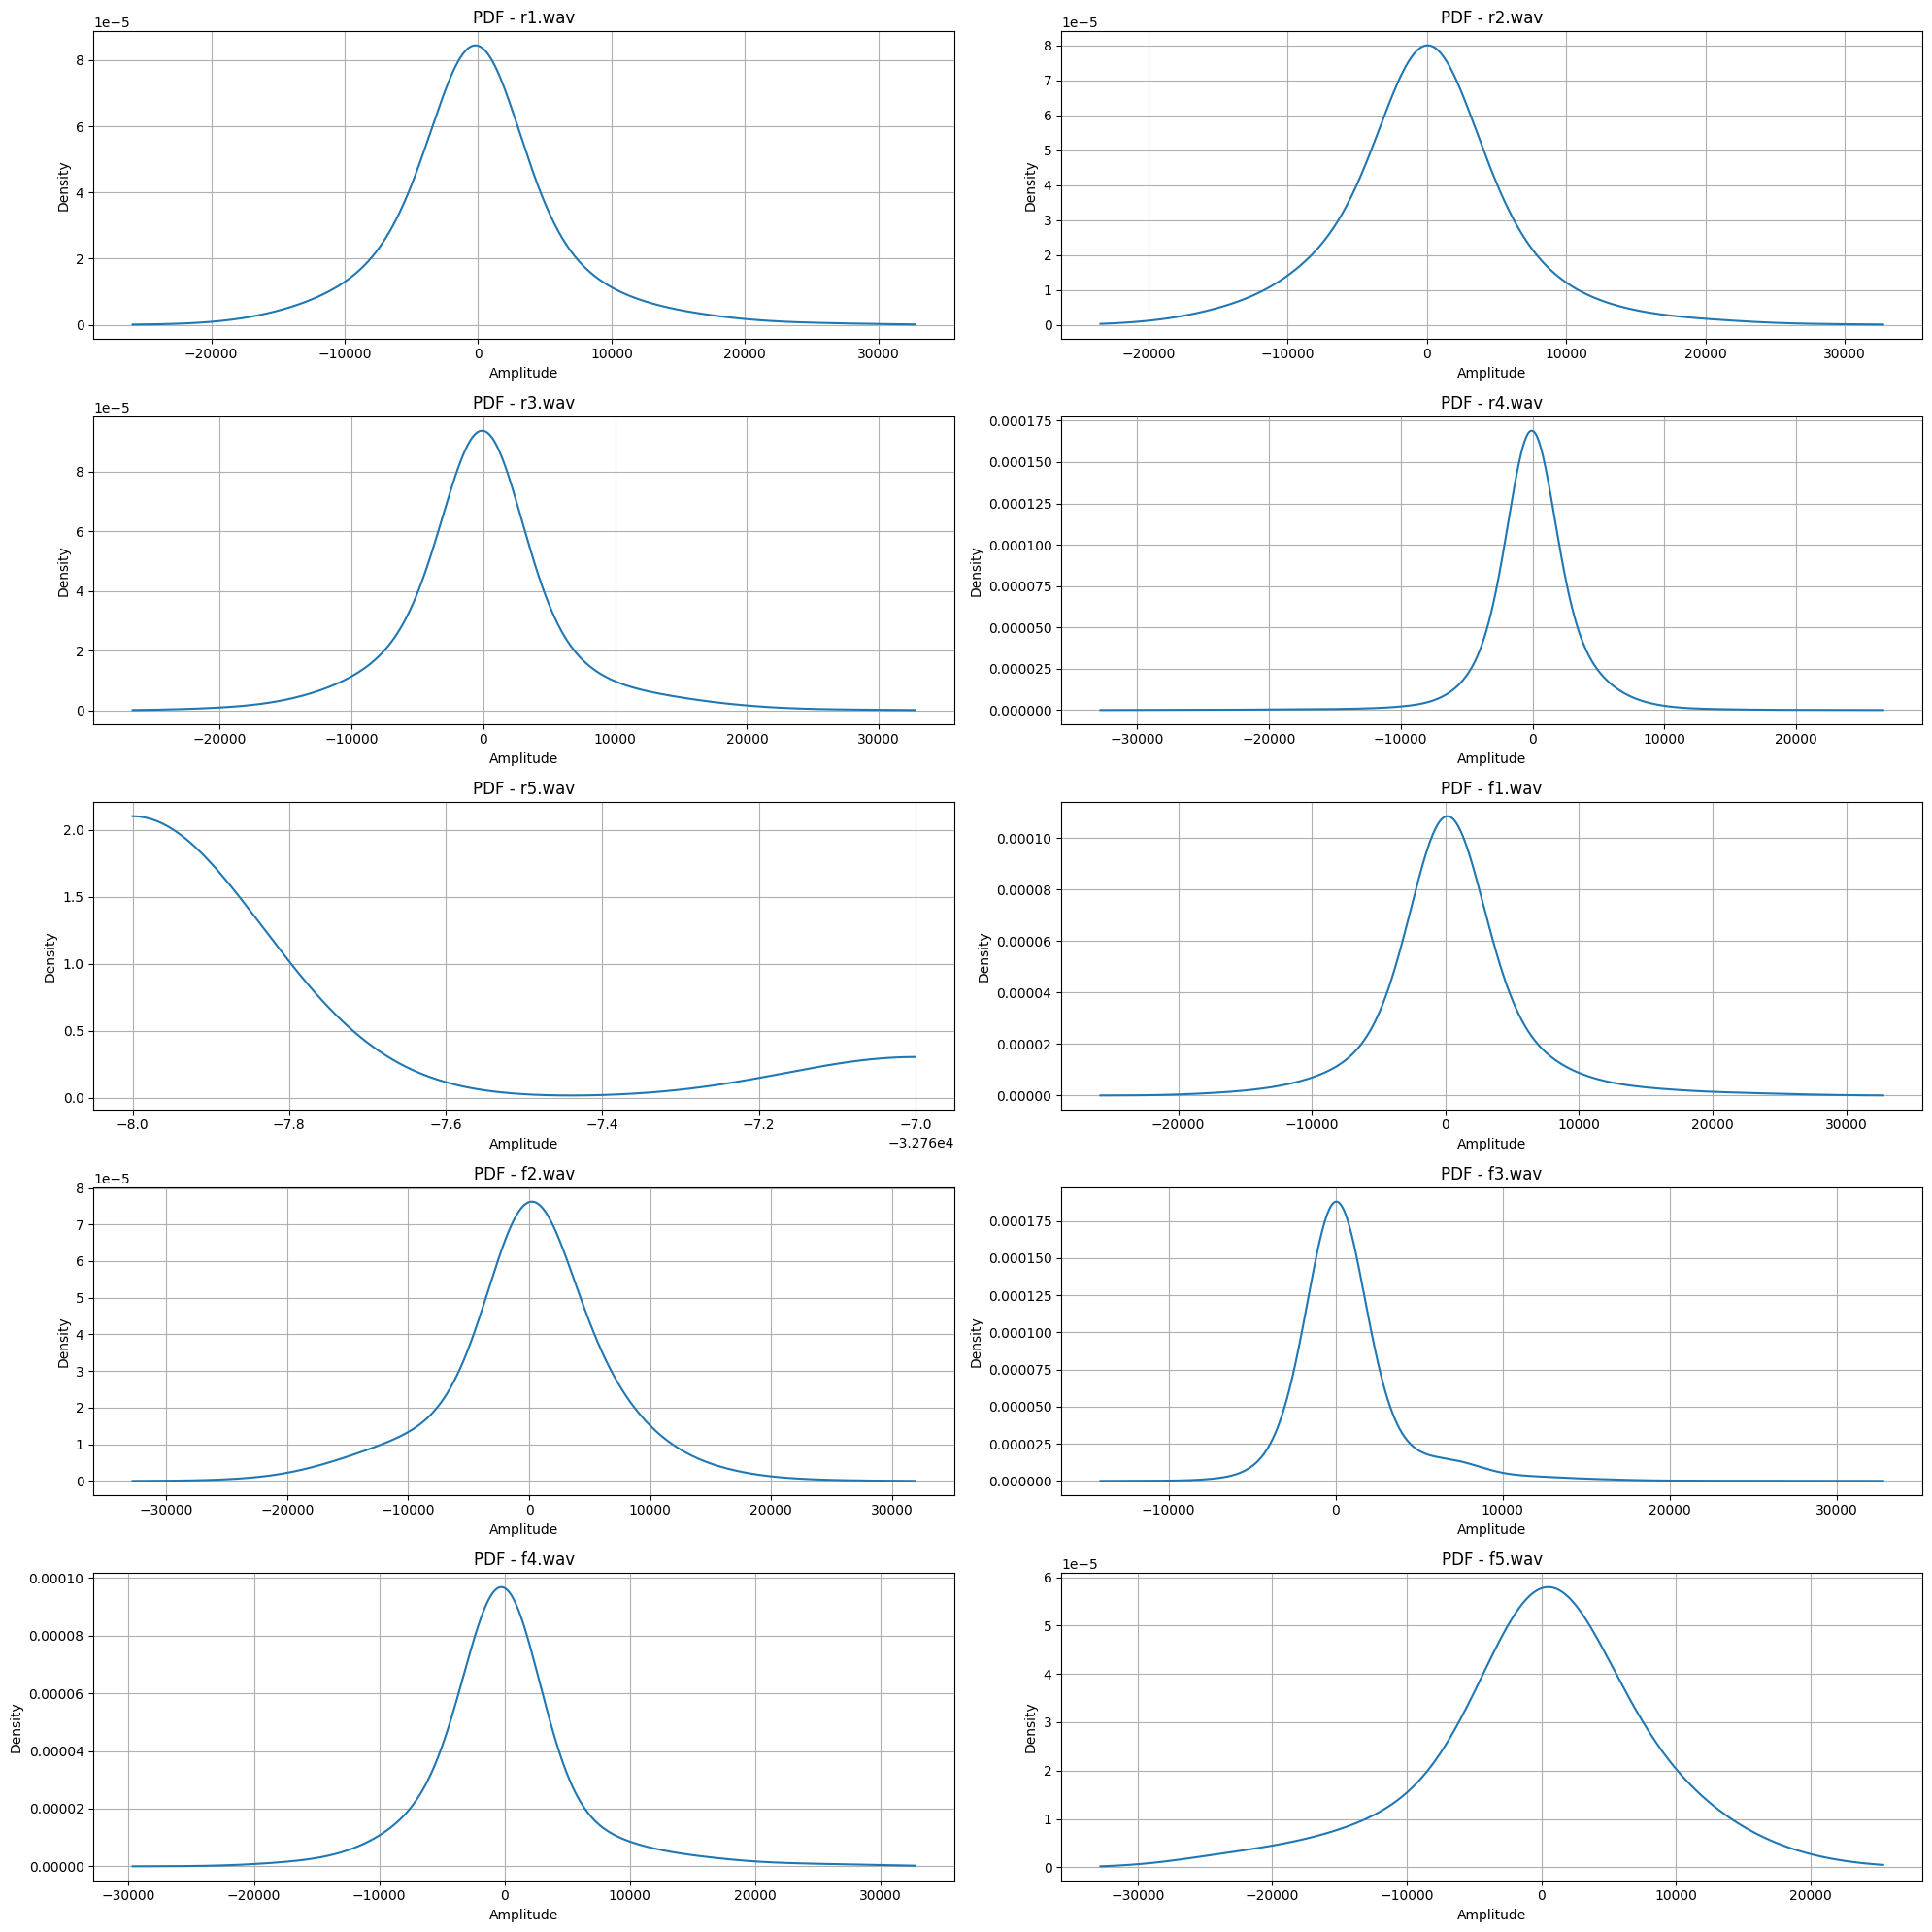

In [45]:
# PDF
plot_features(file_names, lambda x: plt.plot(np.linspace(min(x), max(x), 1000), gaussian_kde(x, bw_method=0.5)(np.linspace(min(x), max(x), 1000))), "PDF", "Amplitude", "Density")


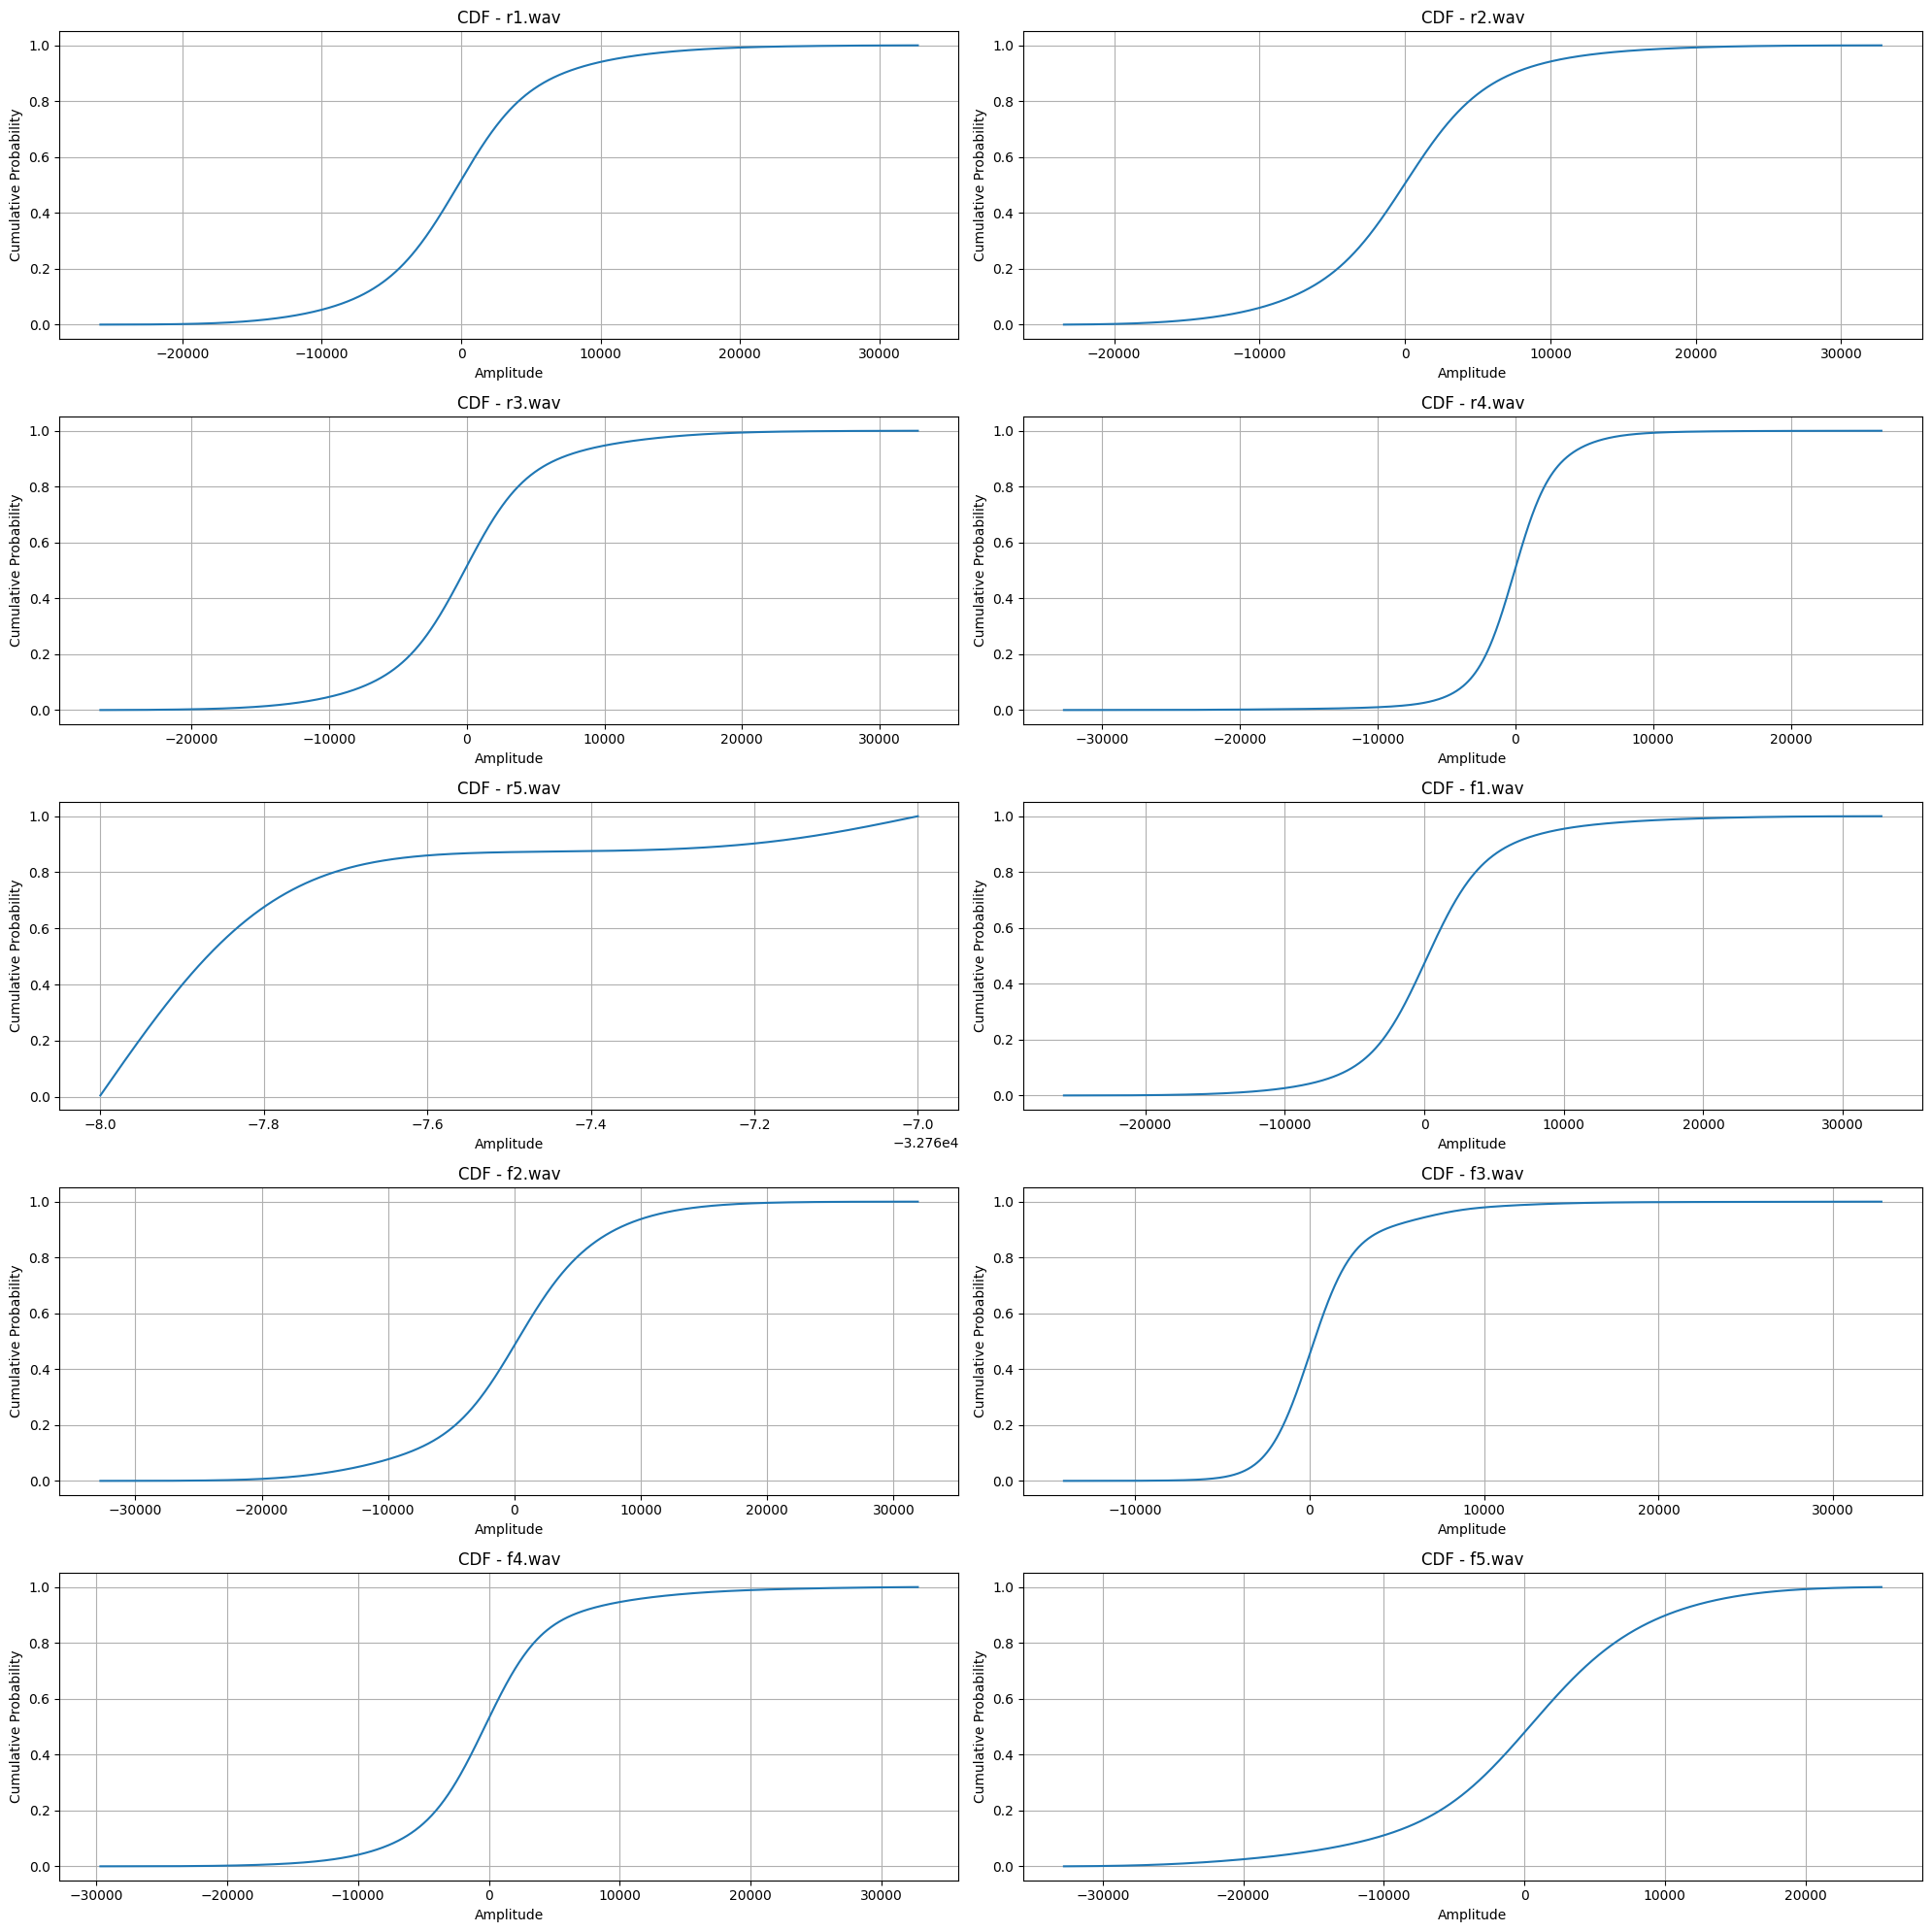

In [46]:
# CDF
plot_features(file_names, lambda x: plt.plot(np.linspace(min(x), max(x), 1000), np.cumsum(gaussian_kde(x, bw_method=0.5)(np.linspace(min(x), max(x), 1000)) / np.cumsum(gaussian_kde(x, bw_method=0.5)(np.linspace(min(x), max(x), 1000)))[-1])), "CDF", "Amplitude", "Cumulative Probability")


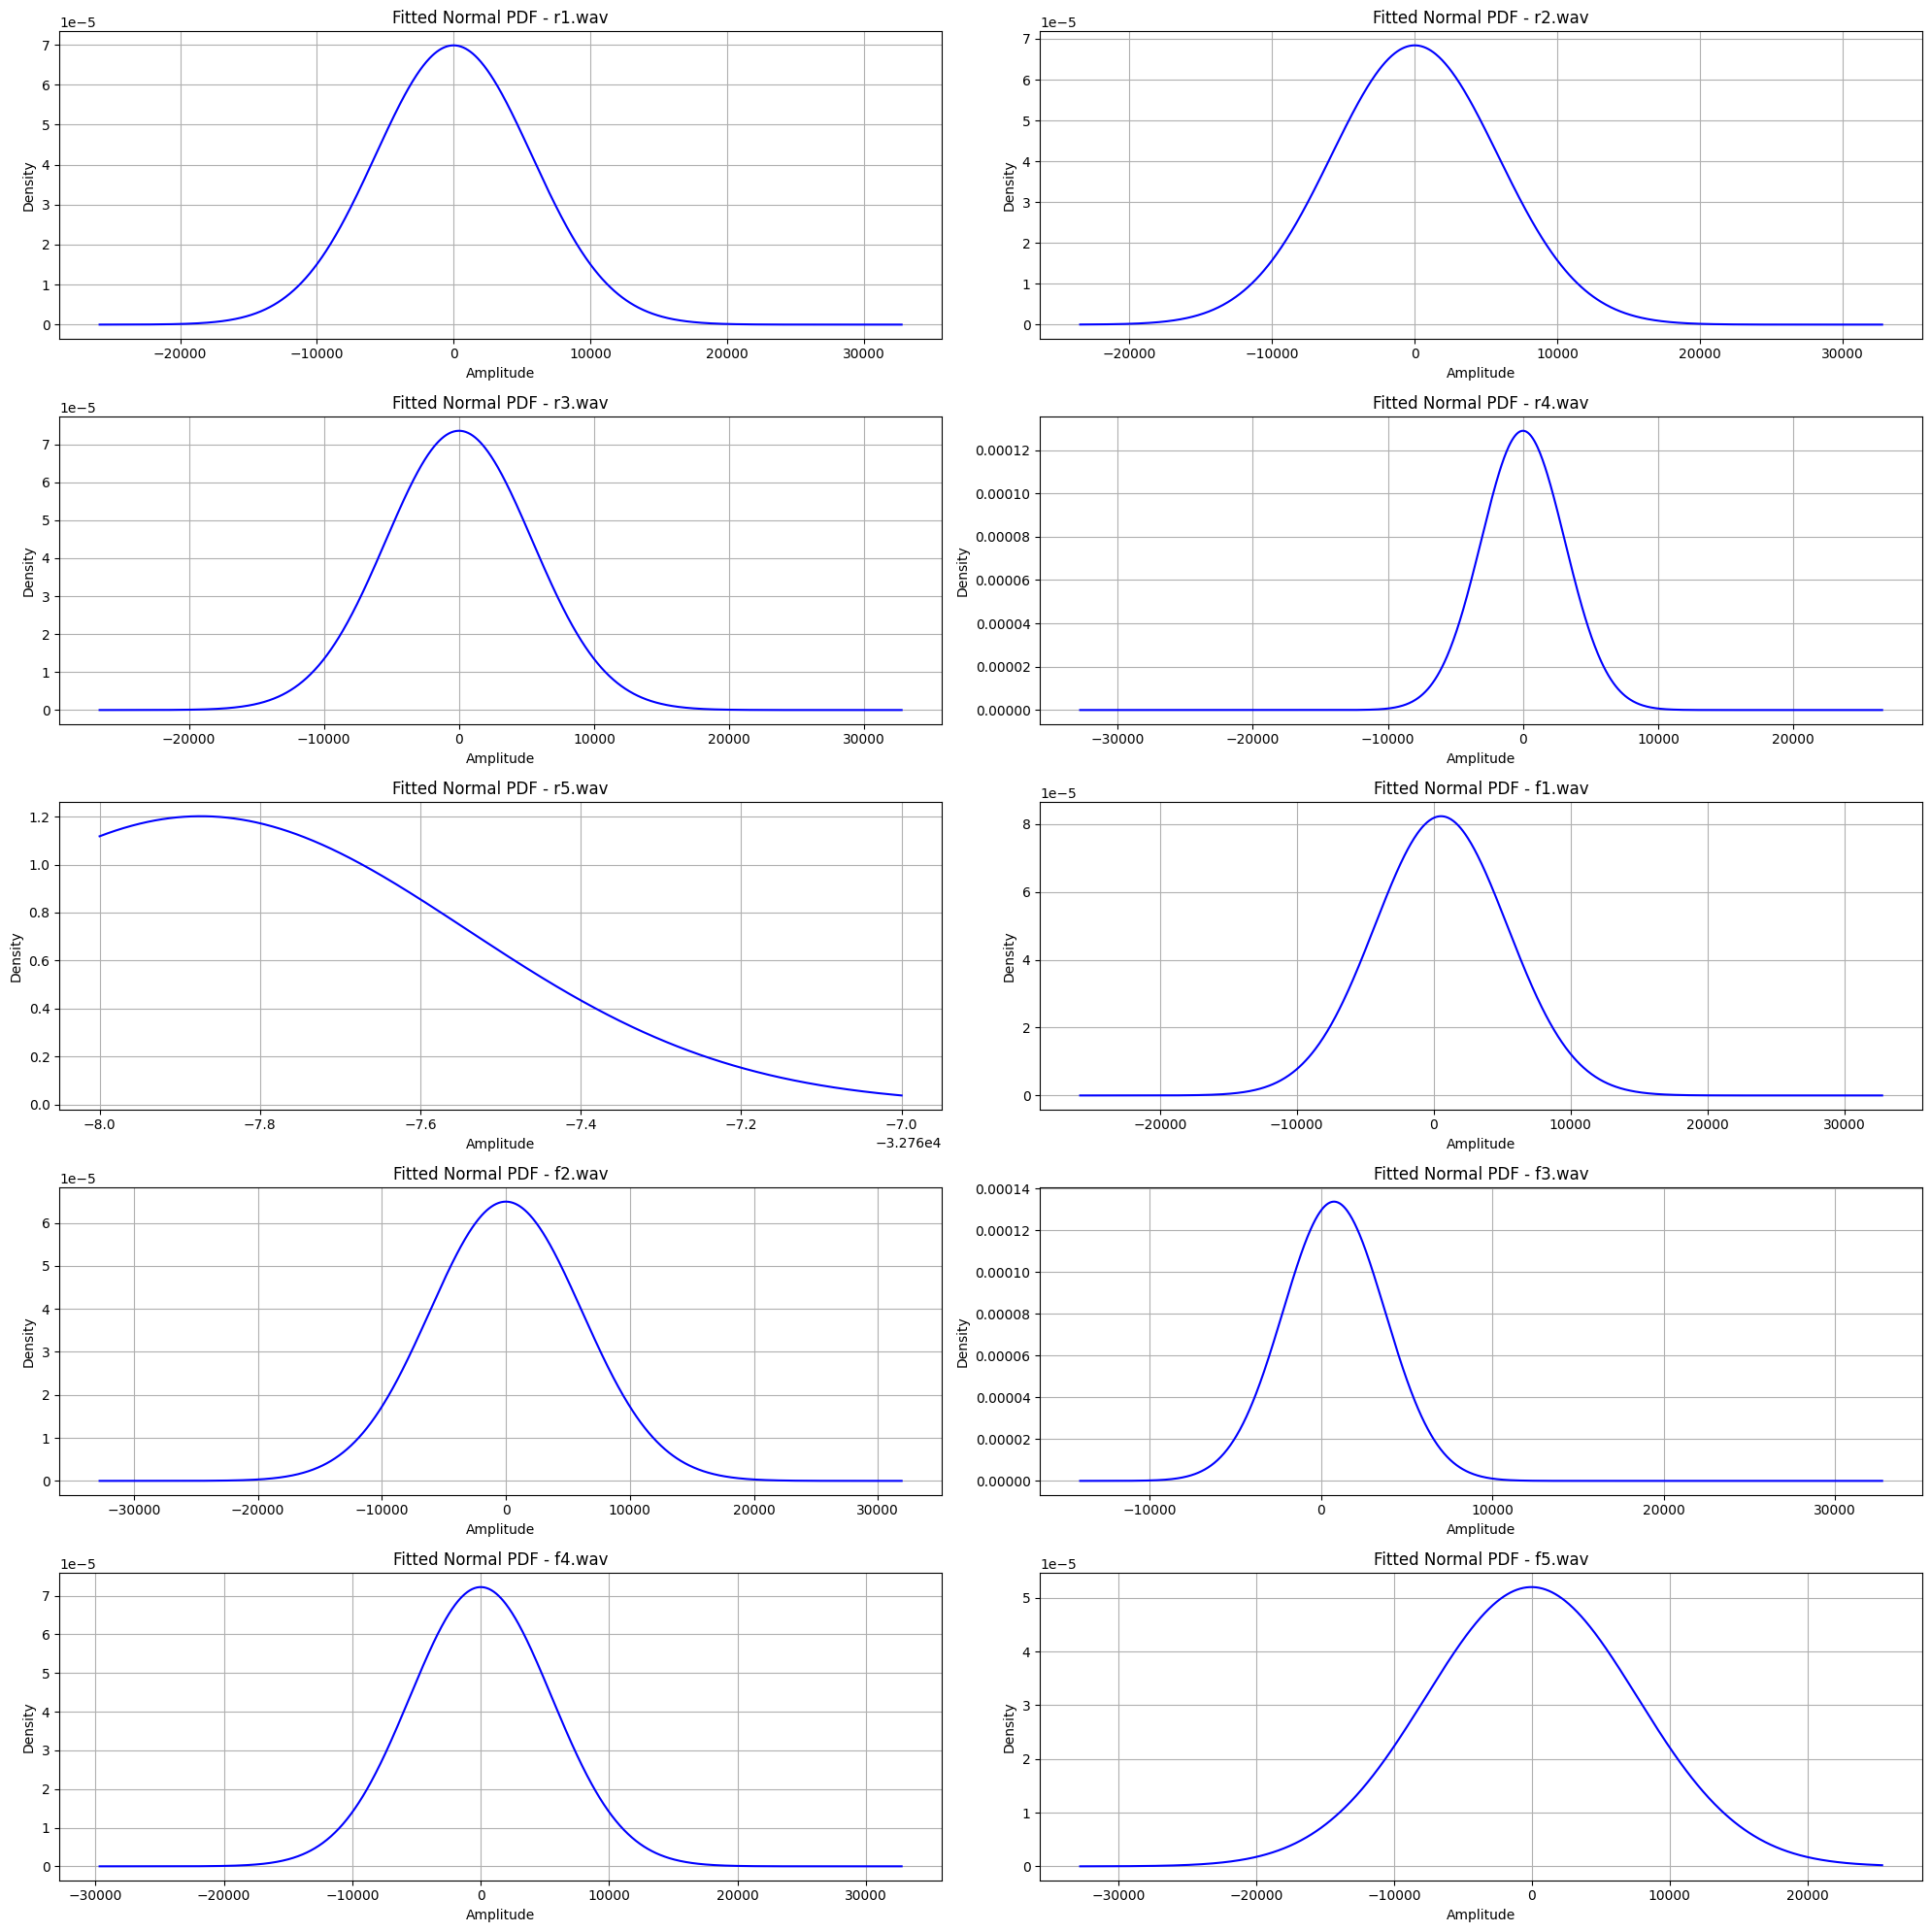

In [47]:
# Fitted Normal PDF
def plot_normal_pdf(audio_data):
    mu, std = norm.fit(audio_data)
    amplitude_values = np.linspace(min(audio_data), max(audio_data), 1000)
    pdf_fitted = norm.pdf(amplitude_values, mu, std)
    plt.plot(amplitude_values, pdf_fitted, color='blue', label='Fitted Normal PDF')

plot_features(file_names, plot_normal_pdf, "Fitted Normal PDF", "Amplitude", "Density")
